# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [61]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [ ]:

np.random.seed(31)

def SimulateObservations2(n,p):
    #... definition de n et p
    # n = 75
    # p =  200   #remarque : n<200 => necessite de selectionner des variables

    #... simulation de X
    X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

    #... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
    beta = 3 * np.random.randn(p)
    inds = np.arange(p)
    np.random.shuffle(inds)
    beta[inds[10:]] = 0 

    #... simulation de y 
    y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


    # REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


    # ... coupe en deux les donnees en donnees d'apprentissage et donnes test
    thresh = n // 2
    X_train = X[thresh:]
    y_train = y[thresh:]
    X_test = X[:thresh]
    y_test = y[:thresh]

    return X_train, y_train, X_test, y_test, beta

X_train, y_train, X_test, y_test, beta = SimulateObservations2(75,200)


#### Régression linéaire avec régularisation Lasso ...


In [63]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


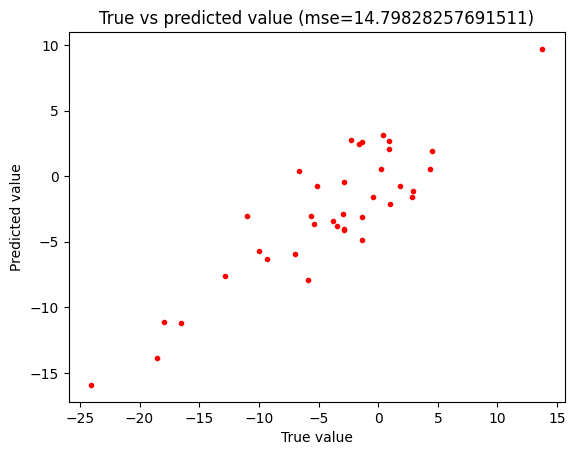

In [64]:
def plot(y_test,y_pred_lasso,mse_score_lasso):  
    fig = plt.figure()
    plt.plot(y_test, y_pred_lasso, 'r.')
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
    plt.show()

plot(y_test,y_pred_lasso,mse_score_lasso)


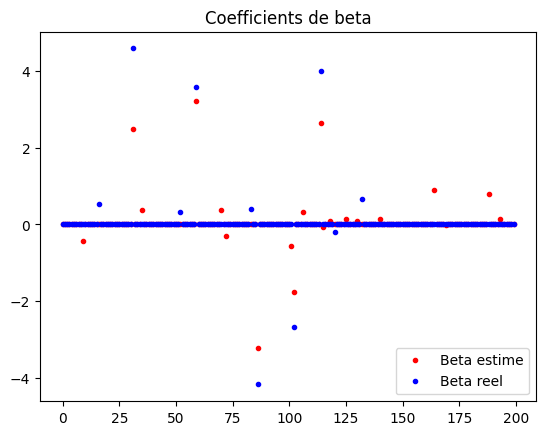

In [65]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

...


n=1000


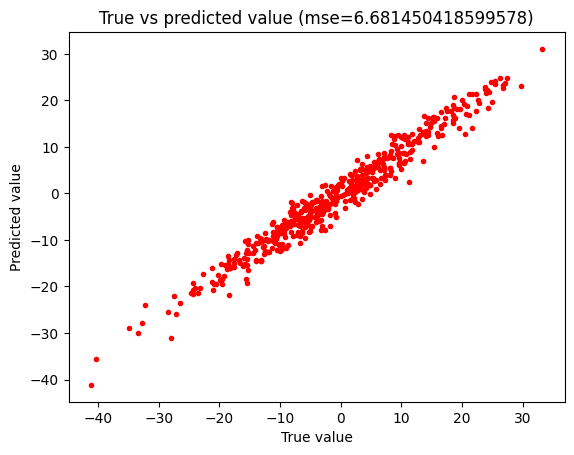

n=100


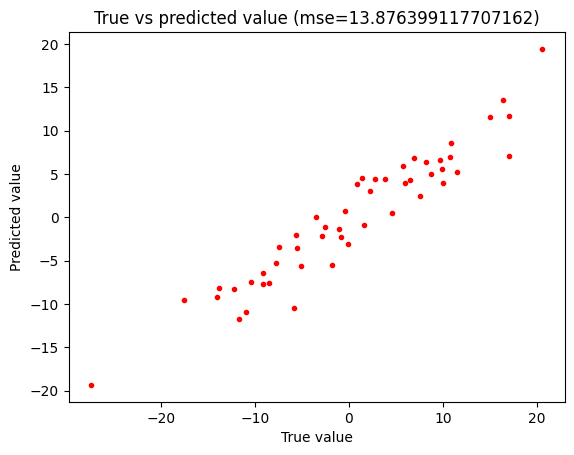

n=50


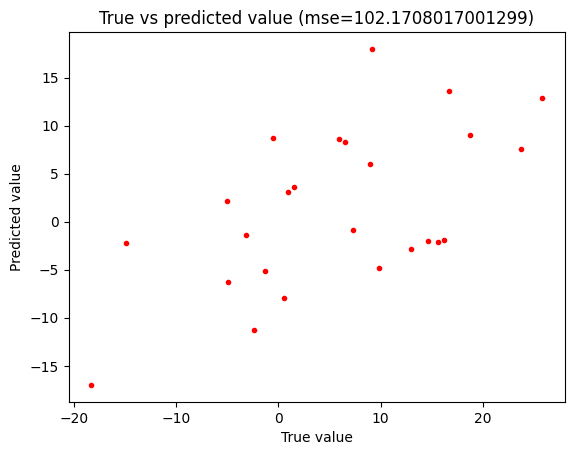

n=25


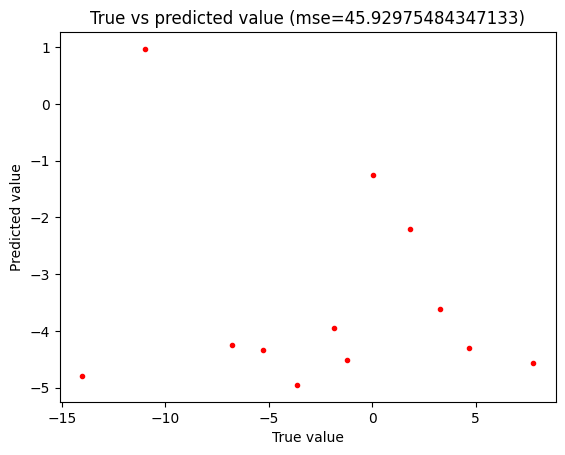

In [66]:
n_s = [1000,100,50,25]

for n in n_s:
    print(f"n={n}")
    X_l,y_l,X_t,y_t,RefTheta=SimulateObservations2(n,200)
    alpha = 0.5

    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_l, y_l)

    y_pred_lasso = lasso_regressor.predict(X_t)
    mse_score_lasso = mean_squared_error(y_t, y_pred_lasso)

    plot(y_t,y_pred_lasso,mse_score_lasso)

On remarque que plus n est grand plus la mse est faible, ce qui parrait logique car en augmentant le nombre d'observations on prend en compte plus d'inofrmations.



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

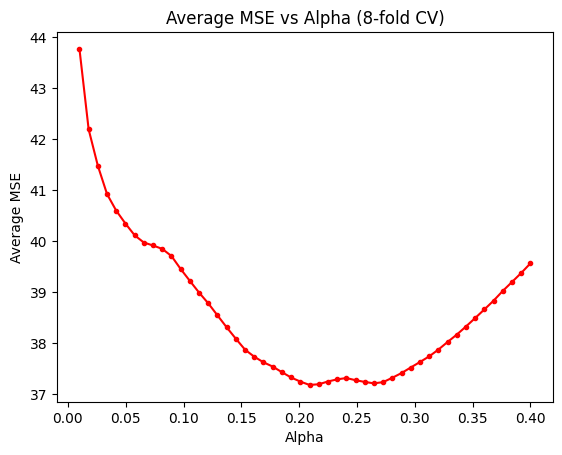

Meilleur alpha (min MSE): 0.209


In [ ]:

from sklearn.model_selection import KFold

alphas = np.linspace(0.01, 0.4, 50)  # 50 valeurs entre 0.001 et 1
avg_mse_scores = []

for alpha in alphas:
    kf = KFold(n_splits=8, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
        
        lasso_regressor = Lasso(alpha=alpha, max_iter=10000)
        lasso_regressor.fit(X_train_kf, y_train_kf)
        
        y_val_pred = lasso_regressor.predict(X_val_kf)
        mse_score = mean_squared_error(y_val_kf, y_val_pred)
        
        mse_scores.append(mse_score)
        
    avg_mse_scores.append(np.mean(mse_scores))

plt.plot(alphas, avg_mse_scores, 'r.-')
plt.xlabel('Alpha')
plt.ylabel('Average MSE')
plt.title('Average MSE vs Alpha (8-fold CV)')
plt.show()

best_alpha = alphas[np.argmin(avg_mse_scores)]
print(f"Meilleur alpha (min MSE): {best_alpha:.3f}")

alpha 0.209 semble minimiser la MSE

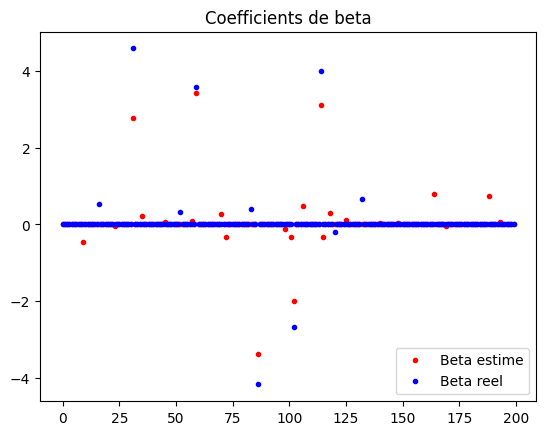

In [68]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


MSE (LASSO): 15.759868174062523
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179

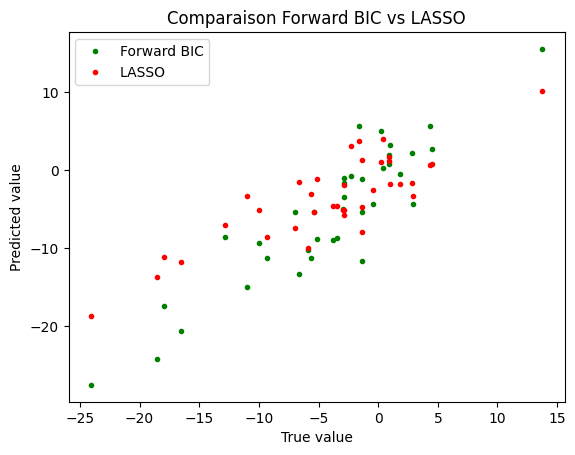

In [ ]:


from sklearn.linear_model import LinearRegression

def compute_bic(y_true, y_pred, n_params):
    """
    Compute the Bayesian Information Criterion (BIC) for a given model.
    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_params: int, number of parameters in the model (including intercept)
    """
    n = len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    bic = n * np.log(mse) + n_params * np.log(n)
    return bic

def forward_selection_bic(X, y, max_features=None):
    n_samples, n_features = X.shape
    selected = []
    remaining = list(range(n_features))
    best_bic = np.inf
    best_model = None

    if max_features is None:
        max_features = n_features

    while remaining and len(selected) < max_features:
        bic_candidates = []
        for idx in remaining:
            features = selected + [idx]
            print(features)
            model = LinearRegression()
            model.fit(X[:, features], y)
            y_pred = model.predict(X[:, features])
            bic = compute_bic(y, y_pred, len(features))
            bic_candidates.append((bic, idx, model))

        bic_candidates.sort()
        bic_new, idx_new, model_new = bic_candidates[0]
        if bic_new < best_bic:
            best_bic = bic_new
            selected.append(idx_new)
            remaining.remove(idx_new)
            best_model = model_new
        else:
            break

    return selected, best_model

# Entraîner le modèle LASSO avec le meilleur alpha trouvé en question 2
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE (LASSO):", mse_score_lasso)

# Appliquer la sélection forward sur les données d'apprentissage
selected_features, fs_model = forward_selection_bic(X_train, y_train, max_features=10)
print("Variables sélectionnées (forward BIC):", selected_features)

# Prédiction et MSE sur le test set
y_pred_fs = fs_model.predict(X_test[:, selected_features])
mse_fs = mean_squared_error(y_test, y_pred_fs)
print("MSE (forward BIC):", mse_fs)

plt.figure()
plt.plot(y_test, y_pred_fs, 'g.', label='Forward BIC')
plt.plot(y_test, y_pred_lasso, 'r.', label='LASSO')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()
plt.title('Comparaison Forward BIC vs LASSO')
plt.show()
